# Summer Olympics Data Analysis Assignment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("summer.csv")

In [3]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [6]:
df.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


# 1. In how many cities Summer Olympics is held so far?

# FirstApproach:-

In [4]:
len(df['City'].unique())

22

# Second Approach(by plotting graph):-

-------------City name with held count------------------- 

                     City  No. of held
3                  London            3
0                  Athens            2
7             Los Angeles            2
1                   Paris            2
13                 Mexico            1
20                 Sydney            1
19                Atlanta            1
18              Barcelona            1
17                  Seoul            1
16                 Moscow            1
15               Montreal            1
14                 Munich            1
11                   Rome            1
12                  Tokyo            1
10  Melbourne / Stockholm            1
9                Helsinki            1
8                  Berlin            1
6               Amsterdam            1
5                 Antwerp            1
4               Stockholm            1
2                St Louis            1
21                Beijing            1


<AxesSubplot:xlabel='City'>

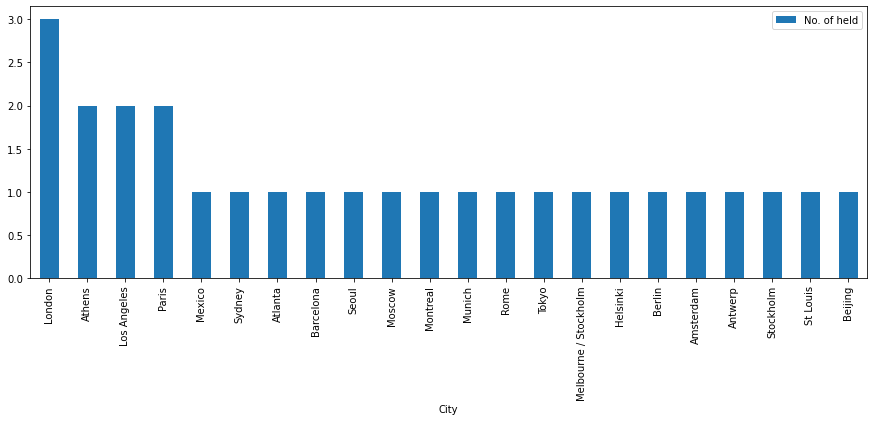

In [39]:
data = []
for city in df['City'].unique():
    held_count = 0
    for year in df['Year'].unique():
        if len(df[(df['City'] == city) & (df['Year'] == year)]) > 0:
            held_count += 1
    data.append([city, held_count])
plot_data = pd.DataFrame(data,columns = ['City','No. of held']).sort_values(by='No. of held', ascending=False)
print("-------------City name with held count------------------- \n")
print(plot_data)
plot_data.plot(x = 'City', y = 'No. of held', kind = 'bar', figsize = (15,5))


# 2. Which Sport is having most number of Gold Medals so far?

## Using pandas groupby:-

<AxesSubplot:xlabel='Sport'>

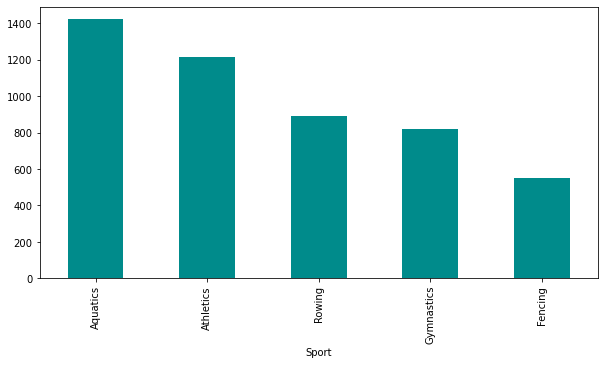

In [43]:
gold= df[df['Medal']=='Gold']
gold.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10, 5),color="DarkCyan")

# Using inbuilt function:-

---------------Top-5 sports having most number of Gold Medals--------------------

         Sport  No. of gold
0     Aquatics         1421
1    Athletics         1215
17      Rowing          890
4   Gymnastics          820
3      Fencing          552


<AxesSubplot:xlabel='Sport'>

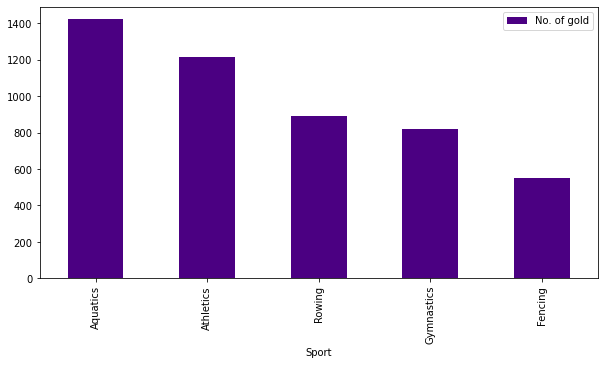

In [46]:
data = []

for sport in df['Sport'].unique():
    data.append([sport , len(df[(df['Sport'] == sport) & (df['Medal'] == "Gold")])])

plot_data = pd.DataFrame(data,columns = ['Sport','No. of gold']).sort_values(by='No. of gold', ascending=False).head()
print("---------------Top-5 sports having most number of Gold Medals--------------------\n")
print(plot_data)
plot_data.plot(x = 'Sport', y = 'No. of gold', kind = 'bar', figsize = (10,5), color = "Indigo")


# 3. Which Sport is having most number of medals so far?

# Using pandas groupby:-

<AxesSubplot:xlabel='Sport'>

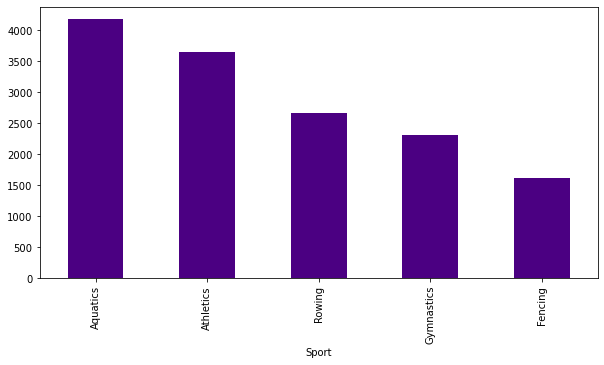

In [29]:
df.groupby('Sport').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10, 5),  color = 'Indigo')

# Using inbuilt function:-

-------------Top-5 sports having most number of Medals-------------

         Sport  No. of medals
0     Aquatics           4170
1    Athletics           3638
17      Rowing           2667
4   Gymnastics           2307
3      Fencing           1613


<AxesSubplot:xlabel='Sport'>

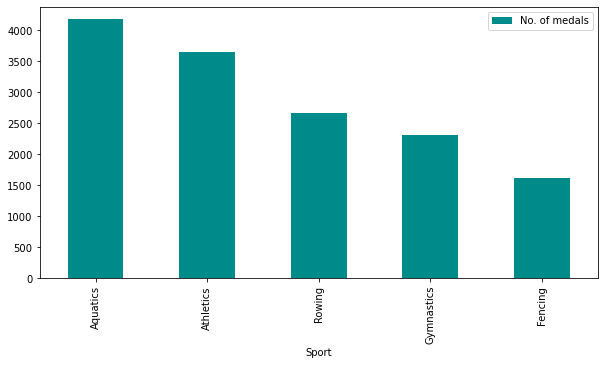

In [30]:
data = []

for sport in df['Sport'].unique():
    data.append([sport , len(df[(df['Sport'] == sport)])])

plot_data = pd.DataFrame(data,columns = ['Sport','No. of medals']).sort_values(by='No. of medals', ascending=False).head()
print("-------------Top-5 sports having most number of Medals-------------\n")
print(plot_data)
plot_data.plot(x = 'Sport', y = 'No. of medals', kind = 'bar', figsize = (10,5), color = 'DarkCyan')


# 4. Which player has won most number of medals? (Top 5)

# Using Pandas groupby:-

<AxesSubplot:xlabel='Athlete'>

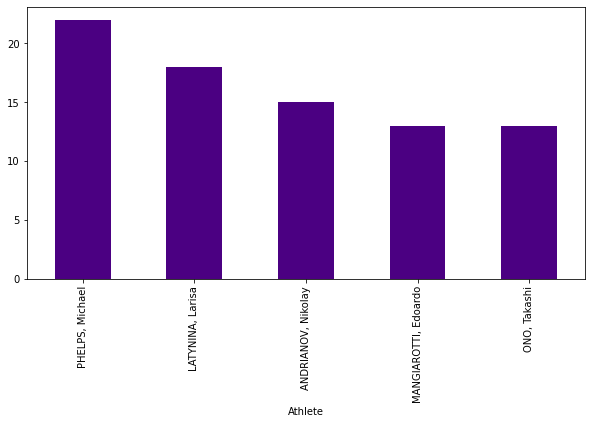

In [32]:
df.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head().plot.bar(figsize=(10, 5), color = 'Indigo')

# Using inbuilt function:-

-----------------Top-5 Players having most number of Medals---------------

                    Athlete  No. of medals
18640       PHELPS, Michael             22
7197       LATYNINA, Larisa             18
9948     ANDRIANOV, Nikolay             15
6591           ONO, Takashi             13
5103   MANGIAROTTI, Edoardo             13


<AxesSubplot:xlabel='Athlete'>

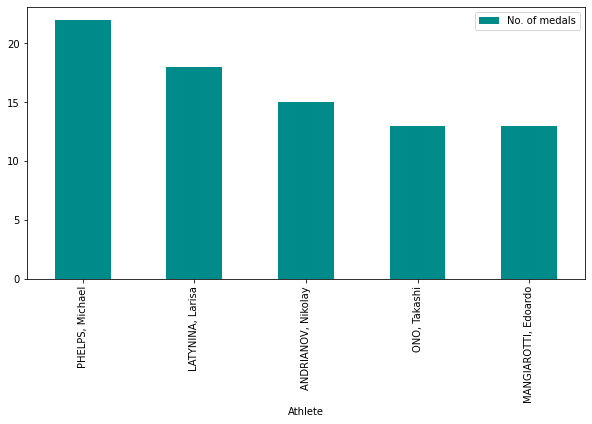

In [33]:
data = []

for athlete in df['Athlete'].unique():
    data.append([athlete , len(df[(df['Athlete'] == athlete)])])

plot_data = pd.DataFrame(data,columns = ['Athlete','No. of medals']).sort_values(by='No. of medals', ascending=False).head()

print("-----------------Top-5 Players having most number of Medals---------------\n")
print(plot_data)
plot_data.plot(x = 'Athlete', y = 'No. of medals', kind = 'bar', figsize = (10,5), color = 'DarkCyan')


# 5. Which player has won most number Gold Medals of medals? (Top 5)

# Using Pandas groupby:-

<AxesSubplot:xlabel='Athlete'>

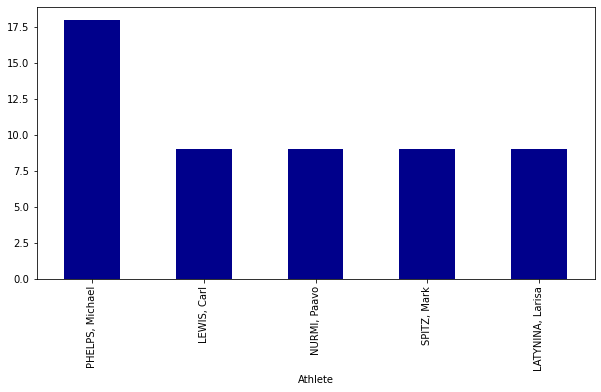

In [44]:
gold= df[df['Medal']=='Gold']
gold.groupby('Athlete').count()['Medal'].sort_values(ascending=False).head(5).plot.bar(figsize=(10, 5), color = 'DarkBlue')

# Using inbuilt function:-

----------Top-5 Players having most number of Gold Medals------------

                Athlete  No. of gold medals
18640   PHELPS, Michael                  18
12468       LEWIS, Carl                   9
8811        SPITZ, Mark                   9
2262       NURMI, Paavo                   9
7197   LATYNINA, Larisa                   9


<AxesSubplot:xlabel='Athlete'>

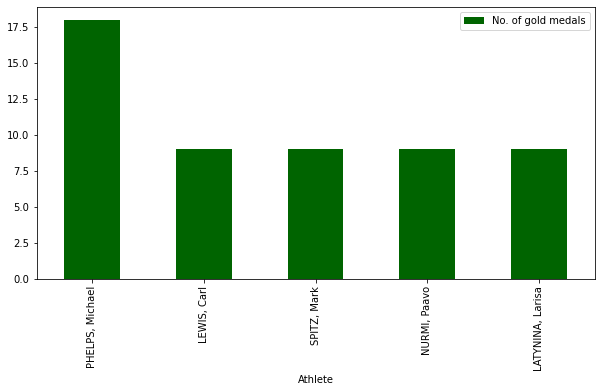

In [45]:
data = []

for athlete in df['Athlete'].unique():
    data.append([athlete , len(df[(df['Athlete'] == athlete) & (df['Medal'] == "Gold")])])

plot_data = pd.DataFrame(data,columns = ['Athlete','No. of gold medals']).sort_values(by='No. of gold medals', ascending=False).head()

print("----------Top-5 Players having most number of Gold Medals------------\n")
print(plot_data)
plot_data.plot(x = 'Athlete', y = 'No. of gold medals', kind = 'bar', figsize = (10,5), color = 'DarkGreen')

# 6. In which year India won first Gold Medal in Summer Olympics?

# Using Pandas groupby:-

In [14]:
gold[gold['Country']=='IND']['Year'].min()

1928

# Using inbuilt function:-

---------------India won Gold Medal in Summer Olympics--------------

    Year  Gold
0   1896     0
1   1900     0
2   1904     0
3   1908     0
4   1912     0
5   1920     0
6   1924     0
7   1928    15
8   1932    11
9   1936    19
10  1948    20
11  1952    14
12  1956    17
13  1960     0
14  1964    15
15  1968     0
16  1972     0
17  1976     0
18  1980    16
19  1984     0
20  1988     0
21  1992     0
22  1996     0
23  2000     0
24  2004     0
25  2008     1
26  2012     0
According to graph we can see that India got first gold medal in 1928


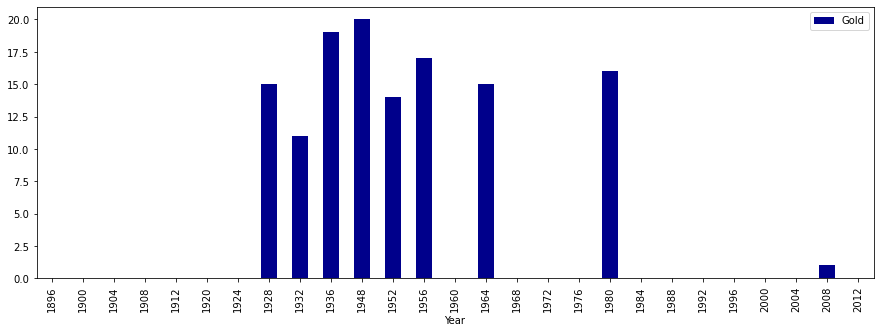

In [35]:
data = []
for year in df['Year'].unique():
    data.append([year , len(df[(df['Year'] == year) & (df['Medal'] == "Gold") & (df['Country'] == "IND")])])

plot_data = pd.DataFrame(data,columns = ['Year','Gold']).sort_values(by='Year', ascending=True)

print("---------------India won Gold Medal in Summer Olympics--------------\n")
print(plot_data)
plot_data.plot(x = 'Year', y = 'Gold', kind = 'bar', figsize = (15,5), color = 'DarkBlue')

print("According to graph we can see that India got first gold medal in 1928")


# 7. Which event is most popular in terms on number of players? (Top 5)

# Using Pandas groupby:-

<AxesSubplot:xlabel='Event'>

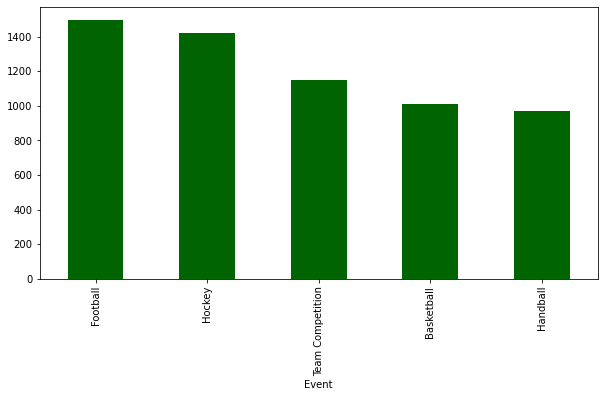

In [48]:
df.groupby("Event").count()['Athlete'].sort_values(ascending=False).head(5).plot.bar(figsize=(10, 5), color = 'DarkGreen')

# Using inbuilt function:-

----------top-5 most popular events in terms on number of players------------ 

                Event  Athletes
80           Football      1497
176            Hockey      1422
138  Team Competition      1147
327        Basketball      1012
337          Handball       973


<AxesSubplot:xlabel='Event'>

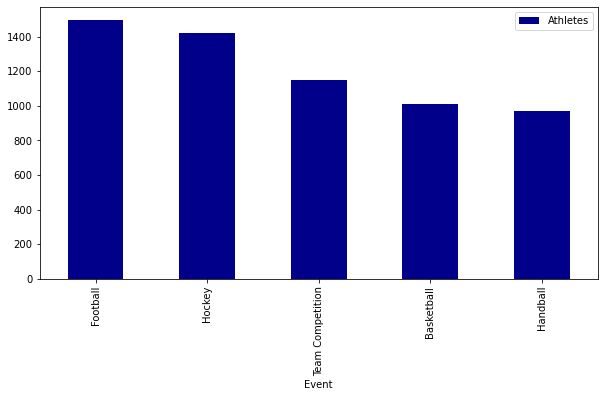

In [49]:
data = []
for event in df['Event'].unique():
    data.append([event , len(df[(df['Event'] == event)])])

plot_data = pd.DataFrame(data,columns = ['Event','Athletes']).sort_values(by='Athletes', ascending=False).head()

print("----------top-5 most popular events in terms on number of players------------ \n")
print(plot_data)
plot_data.plot(x = 'Event', y = 'Athletes', kind = 'bar', figsize = (10,5), color = 'DarkBlue')

# 8. Which sport is having most female Gold Medalists? (Top 5)

------------top-5 Sport that having most female Gold Medalists------------ 

         Sport  No of female athlete
0     Aquatics                   589
1    Athletics                   389
4   Gymnastics                   268
17      Rowing                   217
35  Volleyball                   166


<AxesSubplot:xlabel='Sport'>

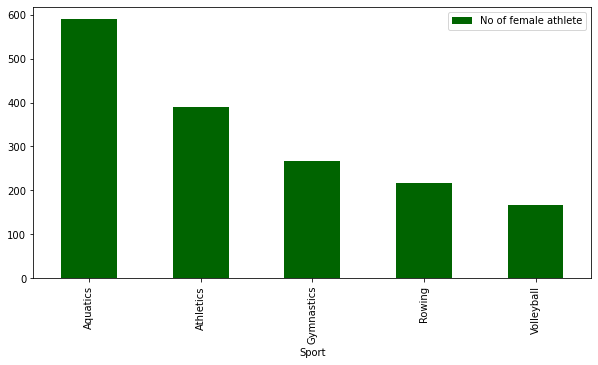

In [38]:
data = []
for sport in df['Sport'].unique():
    data.append([sport , len(df[(df['Sport'] == sport) & (df['Medal'] == "Gold") & (df['Gender'] == "Women")])])

plot_data = pd.DataFrame(data,columns = ['Sport','No of female athlete']).sort_values(by='No of female athlete', ascending=False).head()

print("------------top-5 Sport that having most female Gold Medalists------------ \n")
print(plot_data)
plot_data.plot(x = 'Sport', y = 'No of female athlete', kind = 'bar', figsize = (10,5), color = "DarkGreen")
